In [10]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

In [4]:
np.random.seed(0)

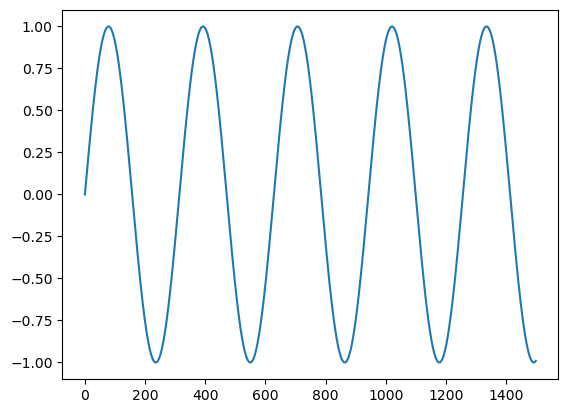

In [7]:
t=np.arange(0,1500)
x_without_noise = np.sin(0.02*t)
plt.plot(t,x_without_noise)

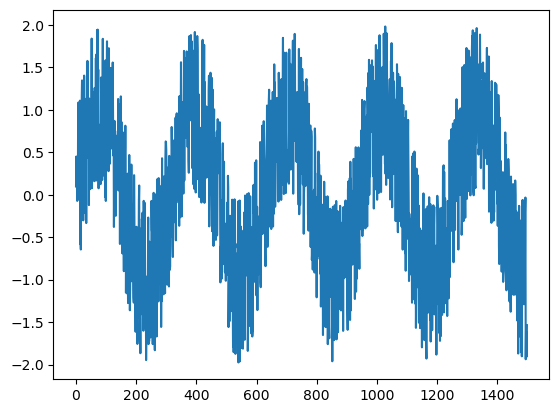

In [6]:
t=np.arange(0,1500)
x = np.sin(0.02*t)+np.random.uniform(low=-1,high=1,size=(1500,))
plt.plot(t,x)

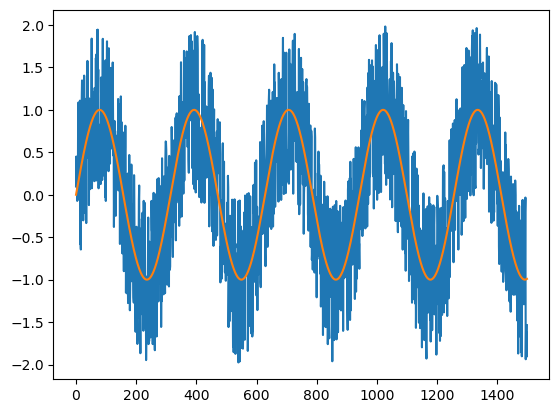

In [8]:
plt.plot(x)
plt.plot(x_without_noise)

# Data preparation

## Train data

In [73]:
nb_sig = 10 #number of training signals
t=np.arange(1,991)
X=[]
trainY=[[np.sin(0.02*t)[i]] for i in range(990)]
for i in range(nb_sig):
    X.append( np.sin(0.02*t)+np.random.uniform(low=-1,high=1,size=(990,)))
trainX=[[[x[i]] for x in X] for i in range(990)]
trainY=np.array(trainY)
trainX=np.array(trainX)

## Test data

In [74]:
nb_sig = 15 #number of training signals
t=np.arange(1,201)
X=[]
testY=[[np.sin(0.4*t)[i]] for i in range(200)]
for i in range(nb_sig):
    X.append( np.sin(0.4*t)+np.random.uniform(low=-1,high=1,size=(200,)))
testX=[[[x[i]] for x in X] for i in range(200)]
testY=np.array(testY)
testX=np.array(testX)

In [75]:
trainY[0]

array([0.01999867])

In [76]:
trainX.shape

(990, 10, 1)

In [77]:
print(trainX[0])

[[-0.0921781 ]
 [ 0.30242879]
 [ 0.30524959]
 [-0.35218241]
 [ 0.32605284]
 [ 0.11587076]
 [ 0.3137985 ]
 [ 0.00786466]
 [ 0.06332558]
 [-0.56624305]]


In [92]:
model = Sequential()
model.add(SimpleRNN(units=1,activation ="tanh"))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='rmsprop')


In [93]:
history = model.fit(trainX,trainY, epochs=200, batch_size=16,verbose=2)

Epoch 1/200
62/62 - 1s - loss: 0.8538 - 1s/epoch - 17ms/step
Epoch 2/200
62/62 - 0s - loss: 0.7615 - 162ms/epoch - 3ms/step
Epoch 3/200
62/62 - 0s - loss: 0.6778 - 171ms/epoch - 3ms/step
Epoch 4/200
62/62 - 0s - loss: 0.6023 - 148ms/epoch - 2ms/step
Epoch 5/200
62/62 - 0s - loss: 0.5342 - 163ms/epoch - 3ms/step
Epoch 6/200
62/62 - 0s - loss: 0.4750 - 161ms/epoch - 3ms/step
Epoch 7/200
62/62 - 0s - loss: 0.4215 - 173ms/epoch - 3ms/step
Epoch 8/200
62/62 - 0s - loss: 0.3781 - 157ms/epoch - 3ms/step
Epoch 9/200
62/62 - 0s - loss: 0.3402 - 156ms/epoch - 3ms/step
Epoch 10/200
62/62 - 0s - loss: 0.3100 - 171ms/epoch - 3ms/step
Epoch 11/200
62/62 - 0s - loss: 0.2843 - 171ms/epoch - 3ms/step
Epoch 12/200
62/62 - 0s - loss: 0.2644 - 146ms/epoch - 2ms/step
Epoch 13/200
62/62 - 0s - loss: 0.2487 - 155ms/epoch - 3ms/step
Epoch 14/200
62/62 - 0s - loss: 0.2374 - 163ms/epoch - 3ms/step
Epoch 15/200
62/62 - 0s - loss: 0.2264 - 157ms/epoch - 3ms/step
Epoch 16/200
62/62 - 0s - loss: 0.2171 - 154ms/epoc

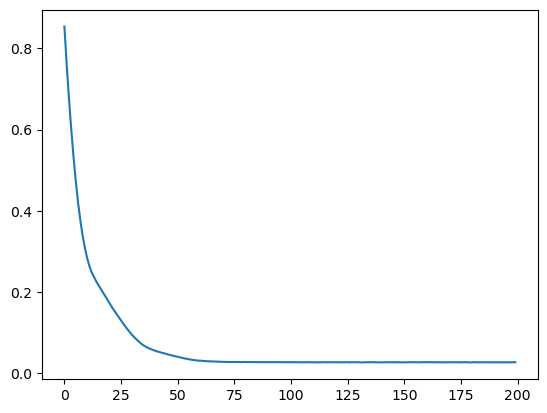

In [94]:
loss = history.history['loss']
plt.plot(loss)

In [95]:
train_predict = model.predict(trainX)
test_predict = model.predict(testX)

7/7 [==============================] - 0s 3ms/step


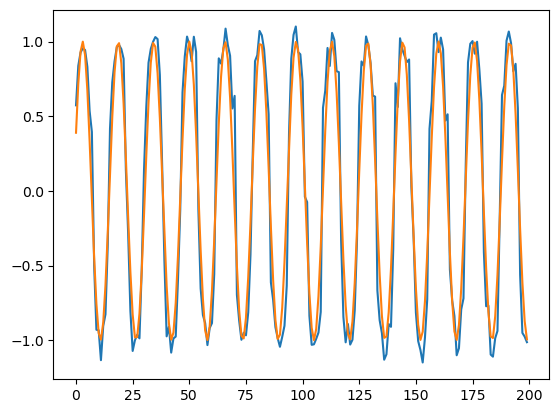

In [96]:
predicted= np.concatenate((train_predict,test_predict))
plt.plot(test_predict)
plt.plot(testY)

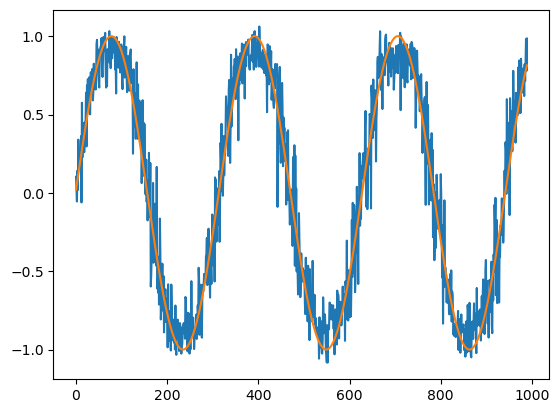

In [97]:
plt.plot(train_predict)
plt.plot(trainY)